# Python Tweepy Crawler

In [1]:
#SA2, about kfc restaurant
import json
sa2_feature = open('C:/Users/LC/Desktop/Fast food research/SA2 analysis/aus_SA2.json','r')
sa2_json = json.loads(sa2_feature.read())

sa2_name = []
sa2_code = []
sa2_polygon = []
for i in range(len(sa2_json['features'])):
    sa2_name.append(sa2_json['features'][i]['properties']['feature_name'])
    sa2_code.append(sa2_json['features'][i]['properties']['feature_code'])
    sa2_polygon.append(sa2_json['features'][i]['geometry']['coordinates'][0][0])
    
def isInsidePolygon(pt, poly):
    c = False
    i = -1
    l = len(poly)
    j = l - 1
    while i < l-1:
        i += 1
        #print i,poly[i], j,poly[j]
        if ((poly[i][0] <= pt[0] and pt[0] < poly[j][0]) or (poly[j][0] <= pt[0] and pt[0] < poly[i][0])):
            if (pt[1] < (poly[j][1] - poly[i][1]) * (pt[0] - poly[i][0]) / (poly[j][0] - poly[i][0]) + poly[i][1]):
                c = not c
        j = i
    return c

def calbest(latlongroup,point):
    for numpoly in range(len(latlongroup)):
        if isInsidePolygon(point,latlongroup[numpoly]):
            #print isInsidePolygon(point,latlongroup[numpoly]),lgacode[numpoly],lganame[numpoly]
            return [sa2_code[numpoly],sa2_name[numpoly]]

In [2]:
from sklearn.feature_extraction import DictVectorizer

def get_BOW(text):
    BOW = {}
    for word in text:
        BOW[word] = BOW.get(word,0) + 1
    return BOW

In [3]:
import csv
f = open("C:/Users/LC/Desktop/Fast food research/mc_info.csv")
f_csv = csv.reader(f)
ta_info = []
latloninfo = []
for info in f_csv:
    latlon = []
    new_info = []
    new_info.extend(info)
    if info[2] == 'lon':
        continue
    else:
        latlon.append(float(info[2]))
        latlon.append(float(info[1]))
    if calbest(sa2_polygon,latlon) == None:
        new_info.extend([' ',' '])
    else:
        new_info.extend(calbest(sa2_polygon,latlon))
        latloninfo.append(calbest(sa2_polygon,latlon))
    ta_info.append(new_info)
print len(ta_info)

208


In [4]:
ffsa2_name = []
for a in latloninfo:
    ffsa2_name.append(a[1])
    
latlonbow = get_BOW(ffsa2_name)
kfcrl = sorted(latlonbow.items(), lambda x, y: cmp(x[1], y[1]), reverse=True)
print len(kfcrl)

127


In [37]:
# # -*- coding: utf-8 -*-  
# # proccessing the raw data
# import json
# import codecs
# ffkword = ['McDonald','maccas']

# thirdfile = open('E:/middleTwitter.json','r')
# containfatkwordfile = codecs.open('E:/seperate twitter/mctwitter.json','w',encoding='utf-8')
# alltext = []
# i = 0
# allt = 0
# for line in thirdfile:
#     text = []
# #     print line
# #     print json.loads(line, encoding='utf8')
# #     break
#     try:
#         new = json.loads(line, encoding='utf8')
#         for word in ffkword:
#             if word.lower() in new['text'].lower():
#                 aaaa = json.dumps(new, ensure_ascii=False)
#                 containfatkwordfile.write(aaaa+'\n')
#                 allt = allt + 1
#                 break
# #                 for word2 in fatkword:
# #                     if word2.lower() in new['text'].lower():
# #                         aaaa = json.dumps(new, ensure_ascii=False)
# #                         containfatkwordfile.write(aaaa+'\n')
# #                         allt = allt + 1
# #                         break
#         i = i + 1
#         if i % 10000 == 30:
#             print 'processing'
#     except BaseException as e:
#         print('Error on_data:'+str(e))
# print allt
# print 'complete'
# thirdfile.close()
# containfatkwordfile.close()

# -*- coding: utf-8 -*-  
# proccessing the raw data
import json
import codecs
ffkword = ['McDonald','maccas']


thirdfile = open('E:/old collect tweet/hycollected.json','r')
containfatkwordfile = codecs.open('E:/seperate twitter/hysimpcollected.json','w',encoding='utf-8')
alltext = []
i = 0
allt = 0
for line in thirdfile:
    text = []
    try:
        new = json.loads(line[:-2], encoding='utf8')
        for word in ffkword:
            if word.lower() in new['doc']['text'].lower():
                aaaa = json.dumps(new, ensure_ascii=False)
                containfatkwordfile.write(aaaa+'\n')
                allt = allt + 1
                break
        i = i + 1
        if i % 10000 == 30:
            print 'processing'
    except BaseException as e:
        print('Error on_data:'+str(e))
print allt
print 'complete'
thirdfile.close()
containfatkwordfile.close()

Error on_data:No JSON object could be decoded
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
Error on_data:Expecting object: line 1 column 2914 (char 2913)
Error on_data:No JSON object could be decoded
Error on_data:No JSON object could be decoded
processing
processing
processing
processing
processing
processing
processing
processing
process

In [58]:
import json
import codecs
containfatkword = open('E:/seperate twitter/hysimpcollected.json','r')
alltext = []
sa2_list = []
allpoint = []
for line in containfatkword:
    coorpoint = []
    new = json.loads(line, encoding='utf8')
    if new['doc']['coordinates'] != None:
        alltext.append(new['doc']['text'])
    #     coorpoint.append(float(line['geo']['coordinates'][1]))
    #     coorpoint.append(float(line['geo']['coordinates'][0]))
        coorpoint.append(float(new['doc']['coordinates']['coordinates'][0]))
        coorpoint.append(float(new['doc']['coordinates']['coordinates'][1]))
        allpoint.append(coorpoint)
        sa2_list.append(calbest(sa2_polygon,coorpoint))
containfatkword.close()
print len(sa2_list)
print len(alltext)

160
160


In [60]:
import csv
fileHeader = ["lat","lon"]
csvFile = open("C:/Users/LC/Desktop/Fast food research/seperate analysis/mcnewsa2.csv", "wb")
writer = csv.writer(csvFile)

writer.writerow(fileHeader)
for a in allpoint:
    writer.writerow(a)
csvFile.close()

In [61]:
sa2_namelist = []
for a in sa2_list:
    if a != None:
        sa2_namelist.append(a[1])
        
kfctw =sorted(get_BOW(sa2_namelist).items(), lambda x, y: cmp(x[1], y[1]), reverse=True)
print len(kfctw)

41


In [62]:
kfclt = []
for a in kfcrl:
    new = []
    new.extend(a)
    for b in kfctw:
        if a[0] == b[0]:
            new.append(b[1])
    kfclt.append(new)

In [63]:
print len(kfclt)

127


In [56]:
kfclinear = []
num_kfc = []
num_tweet = []
for a in kfclt:
    if len(a) == 3:
        kfclinear.append(a)
        num_kfc.append([a[1]])
        num_tweet.append(a[2])
print len(kfclinear)

0


In [31]:
print kfclinear[:3]

[[u'Melbourne', 8, 49], [u'Malvern East', 4, 3], [u'Beaconsfield - Officer', 4, 1]]


In [32]:
import csv
fileHeader = ["sa2_name","num_maccas","num_tweet_old"]
csvFile = open("C:/Users/LC/Desktop/Fast food research/seperate analysis/mclgainfo3p.csv", "wb")
writer = csv.writer(csvFile)

writer.writerow(fileHeader)
for a in kfclinear:
    writer.writerow(a)
csvFile.close()

In [ ]:
import csv
fileHeader = ["sa2_name","num_maccas","num_tweet_old","num_tweet_new"]
csvFile = open("C:/Users/LC/Desktop/Fast food research/seperate analysis/mclgainfo.csv", "wb")
writer = csv.writer(csvFile)

writer.writerow(fileHeader)
for a in analydata:
    writer.writerow(a)
csvFile.close()

In [27]:
#linear regression
import matplotlib.pyplot as plt  
import numpy as np   
from sklearn import datasets, linear_model  

In [28]:
#function to show the linear model
def show_linear_model(x,y):
    #Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(x,y)
    plt.scatter(x,y,color = 'blue')
    plt.plot(x,regr.predict(x),color = 'red',linewidth = 4)
    plt.xticks((x))
    plt.yticks((y))
    plt.show()

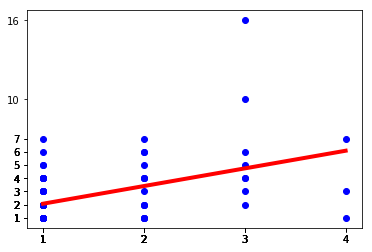

In [29]:
show_linear_model(num_kfc[1:],num_tweet[1:])